# **Predicting Medical Expenses Using Machine Learning**

## **1. Project Summary**

The Predicting Medical Expenses Using Machine Learning project focuses on training and comparing machine learning models to predict healthcare costs based on patients' demographic and health attributes. Through this analysis, the project identifies key factors driving medical expenses, such as smoking, BMI, and age, providing valuable insights into what contributes to higher costs. By evaluating and comparing the performance of models like Linear Regression and Random Forest, the project aims to determine the most effective approach for expense prediction and understand the underlying cost dynamics.

### **Dataset**

The dataset used is the Medical Cost Personal Dataset available on Kaggle. Dataset link. The dataset includes various features such as:

 **Predictors:**
*   Age: Age of the patient.
*   BMI: Body Mass Index.
*   Children: Number of children covered by health insurance.
*   Smoker: Smoking status (Yes/No).
*   Region: Geographic region in the U.S.
*   List item

**Target variable:**
Charges: The medical cost incurred



## 2. Data Preparation

In [30]:
# Install Libraries
!pip install pandas scikit-learn

In [40]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Load the dataset
data = pd.read_csv('insurance.csv')
data.head()

## Display data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 3. Data Processing

In [33]:
# Handle categorical variables
data = pd.get_dummies(data, columns=["sex", "smoker", "region"], drop_first=True)


# Split the dataset
X = data.drop('charges', axis=1)
y = data['charges']

## 4. Train the Models

### Linear Regression

In [42]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

# Predict the  model
y_pred = LinReg.predict(X_test)

# Evaluate the model
mean_squared_error = mean_squared_error(y_test, y_pred)
r_sqaured = r2_score(y_test, y_pred)


print("Mean Squared Error:", mean_squared_error)
print("R-Squared:", r_sqaured)

Mean Squared Error: 33596915.85136145
R-Squared: 0.7835929767120724


### RandomForsest

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

# Train and evaluate Random Forest Regressor model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

RandForest = RandomForestRegressor(random_state=42)
RandForest.fit(X_train, y_train)

# Predict the model
y_pred_rf = RandForest.predict(X_test)

# Evaluate the model
# Use the imported mean_squared_error function instead of the variable
mean_squared_error_rf = mean_squared_error(y_test, y_pred_rf)
r_squared_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error:", mean_squared_error_rf)
print("Random Forest R-Squared:", r_squared_rf)

Random Forest Mean Squared Error: 20942520.922619622
Random Forest R-Squared: 0.8651034329144947


## 6. Evaluate Models

In [46]:
# Evaluate Linear Regression
y_pred_lr = LinReg.predict(X_test)
mean_squared_error_lr = mean_squared_error(y_test, y_pred_lr)
r_squared_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Mean Squared Error:", mean_squared_error_lr)
print("Linear Regression R-Squared:", r_squared_lr)

# Train and evaluate Random Forest
RandForest = RandomForestRegressor(random_state=42)
RandForest.fit(X_train, y_train)
y_pred_rf = RandForest.predict(X_test)
mean_squared_error_rf = mean_squared_error(y_test, y_pred_rf)
r_squared_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error:", mean_squared_error_rf)
print("Random Forest R-Squared:", r_squared_rf)

Linear Regression Mean Squared Error: 33596915.85136145
Linear Regression R-Squared: 0.7835929767120724
Random Forest Mean Squared Error: 20942520.922619622
Random Forest R-Squared: 0.8651034329144947


## Actual vs. Predicted Plot

Text(0, 0.5, 'Predicted Values')

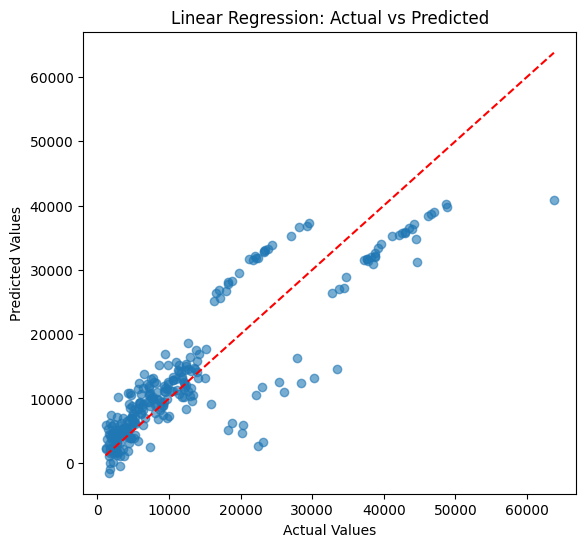

In [51]:
plt.figure(figsize=(14, 6))

# Linear Regression Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")



*   As medical expenses increase, predictions tend to deviate more from the actual values, with some outliers.
*   This indicates that the Linear Regression model struggles to handle higher medical expense values more effectively.



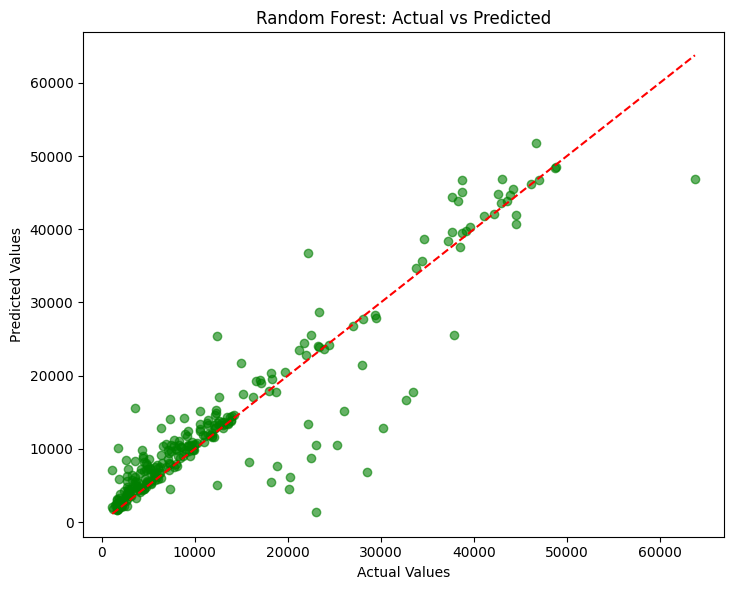

In [50]:
plt.figure(figsize=(14, 6))

# Random Forest Actual vs Predicted
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='g')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()



*   The spread of points around the line is minimal, showcasing the model's ability to handle both lower and higher values of medical expenses effectively.

*  Outliers exist but are significantly fewer compared to the Linear Regression graph.


## Feature Importance (for Random Forest)

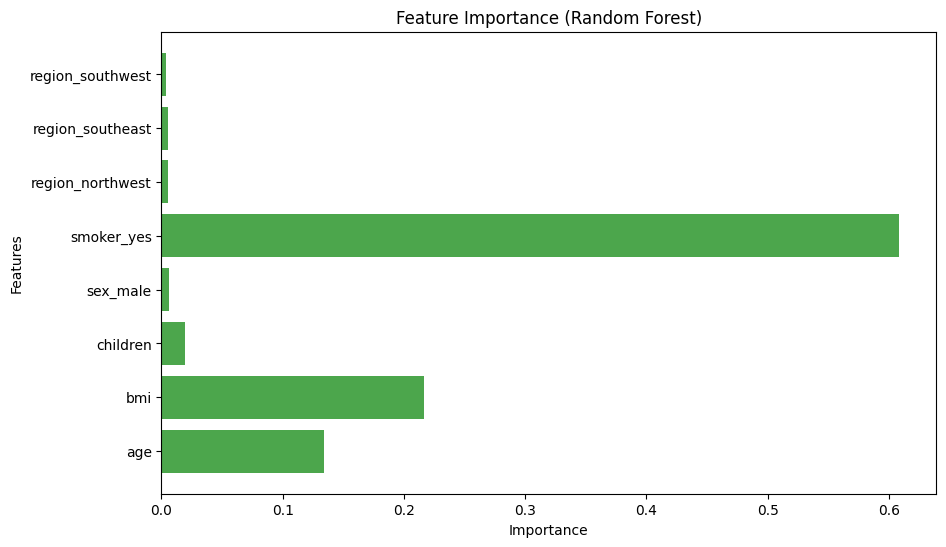

In [52]:
# Feature importance
importances = RandForest.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='green', alpha=0.7)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()



*   The chart highlights that lifestyle choices (smoking) and health indicators (BMI, age) are the most critical factors in predicting medical expenses.

*   Demographic factors like region and gender play a limited role.



## 7. Conclusion


*   Smoking is the primary driver of medical expenses, followed by BMI and age.

*   Demographics like region and gender have minimal impact on predictions.


*   Random Forest effectively captures key cost-driving factors for accurate predictions.


## 8. Recommendations

*   Focus on smoking cessation and weight management programs to reduce costs.

*   Tailor healthcare plans for high-risk groups based on smoker status, BMI, and age.


*   Use feature importance insights to prioritize impactful interventions for cost reduction.
